# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '?appid=' + weather_api_key + '&units=' + units + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | bikenibeu village
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | hoxtolgay
City not found. Skipping...
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | acaponeta
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | inderbor
Processing Record 17 of Set 1 | yangliuqing
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | mendi
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | albany
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-20.47,100,58,1.73,RU,1698695908
1,adamstown,-25.0660,-130.1015,22.71,75,100,4.26,PN,1698695908
2,hawaiian paradise park,19.5933,-154.9731,27.16,92,100,2.57,US,1698695616
3,keflavik,64.0049,-22.5624,3.24,75,40,6.17,IS,1698695922
4,port-aux-francais,-49.3500,70.2167,2.91,80,100,15.76,TF,1698695924


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-20.47,100,58,1.73,RU,1698695908
1,adamstown,-25.0660,-130.1015,22.71,75,100,4.26,PN,1698695908
2,hawaiian paradise park,19.5933,-154.9731,27.16,92,100,2.57,US,1698695616
3,keflavik,64.0049,-22.5624,3.24,75,40,6.17,IS,1698695922
4,port-aux-francais,-49.3500,70.2167,2.91,80,100,15.76,TF,1698695924


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

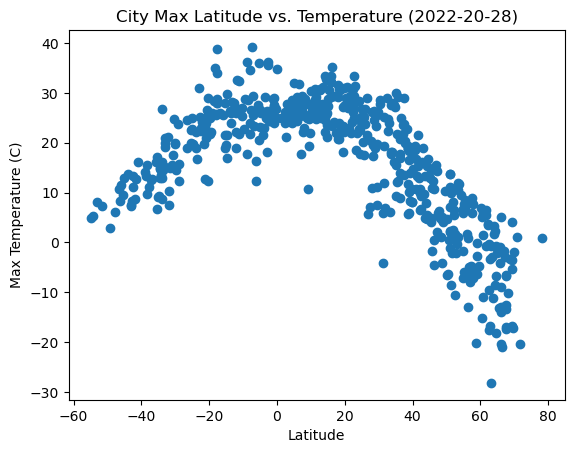

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-20-28)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

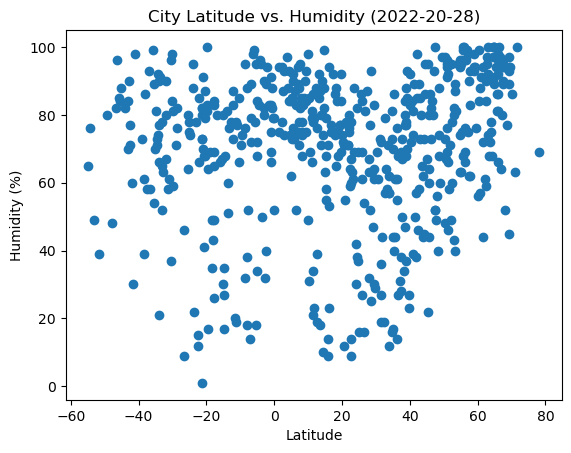

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-20-28)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

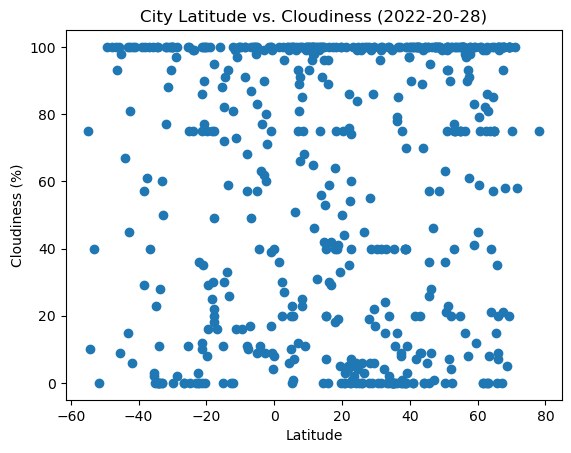

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-20-28)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

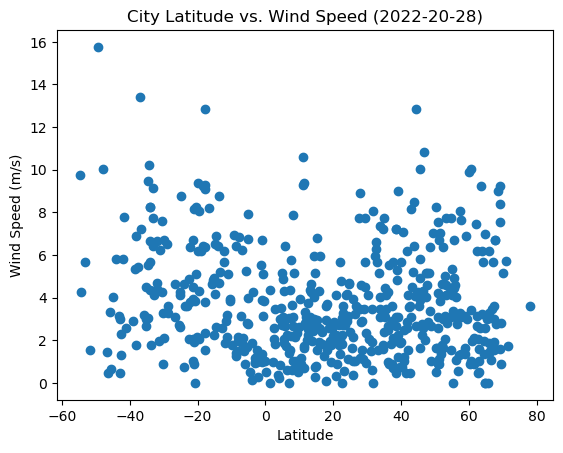

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-20-28)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def plot_line_reg(hemisphere_df, Y):
    x = hemisphere_df['Lat']
    y = hemisphere_df[Y]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_line_reg = slope * x + intercept
    print(f'The r-value is: {rvalue:.4f}')

    fig, axes = plt.subplots()
    plt.scatter(x, y)
    plt.plot(x, y_line_reg, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(Y)
    plt.text(x.min(), y.max(), f' y = {slope:.4f} * x + {intercept:.4f}', color = 'red')
    #plt.text(f'y = {slope:.4f} * x + {intercept:.4f}', color = 'red')
    plt.show()

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-20.47,100,58,1.73,RU,1698695908
2,hawaiian paradise park,19.5933,-154.9731,27.16,92,100,2.57,US,1698695616
3,keflavik,64.0049,-22.5624,3.24,75,40,6.17,IS,1698695922
5,bubaque,11.2833,-15.8333,28.66,66,100,0.69,GW,1698695925
6,bikenibeu village,1.3673,173.1241,24.98,94,100,0.00,KI,1698695940


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,22.71,75,100,4.26,PN,1698695908
4,port-aux-francais,-49.3500,70.2167,2.91,80,100,15.76,TF,1698695924
7,blackmans bay,-43.0167,147.3167,7.51,70,15,0.45,AU,1698695947
8,geraldton,-28.7667,114.6000,12.23,76,2,3.60,AU,1698695951
10,port elizabeth,-33.9180,25.5701,16.16,77,0,8.23,ZA,1698695952


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8678


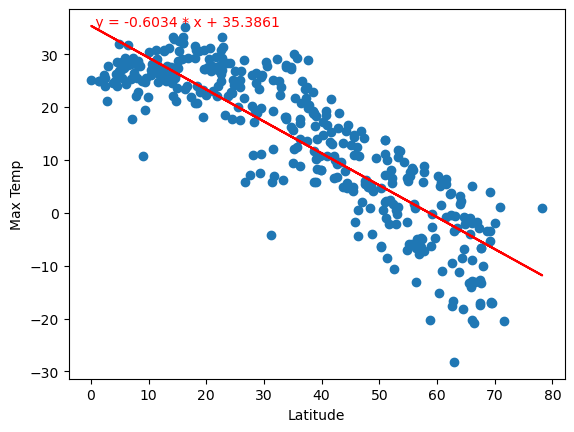

In [66]:
# Linear regression on Northern Hemisphere
plot_line_reg(northern_hemi_df, 'Max Temp')

The r-value is: 0.7741


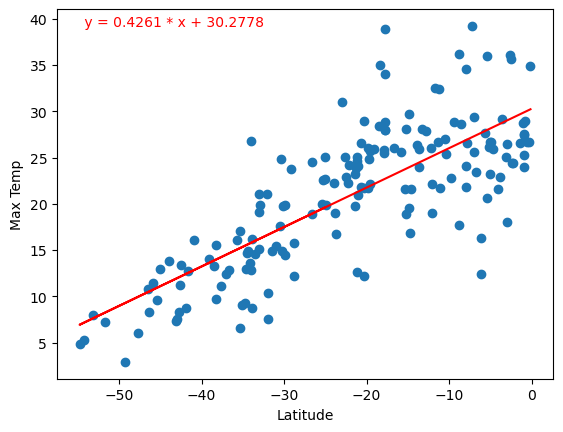

In [67]:
# Linear regression on Southern Hemisphere
plot_line_reg(southern_hemi_df, 'Max Temp')

**Discussion about the linear relationship:**

There is a relatively strong relationship between the maximum temperature of the city and the latitude where its located.

In the case of the northern hemisphere, the relationship is negative and a stronger than in the southern hemisphere, in which te relationship is a positive relationship.

We can say that the latitude of the city has a direct effect on the maximum temperature of a city, however there should be some other factors that can play a role.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1798


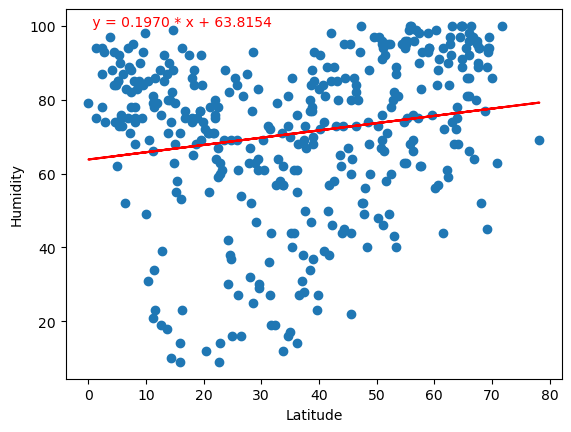

In [68]:
# Northern Hemisphere
plot_line_reg(northern_hemi_df, 'Humidity')

The r-value is: -0.0400


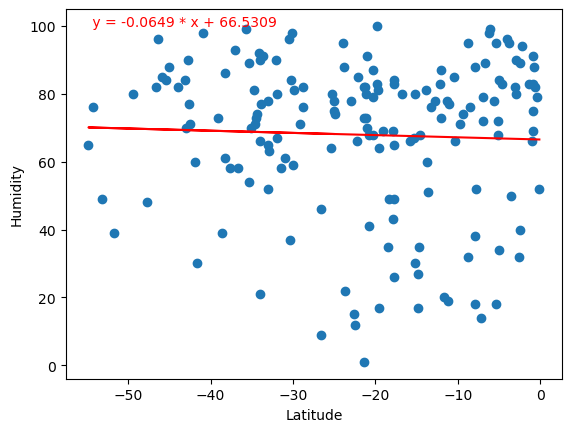

In [69]:
# Southern Hemisphere
plot_line_reg(southern_hemi_df, 'Humidity')

**Discussion about the linear relationship:**

The evidence suggests there is no relationship between the humidity of a city and the latitude where its located.

In both cases the dispesion of the datapoints is to high, and there is no observable relationship between humidity and the latitude of a city.

We can say that the latitude of the city has no effect on the humidity of a city, and humidity should be related to some other factors than the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0695


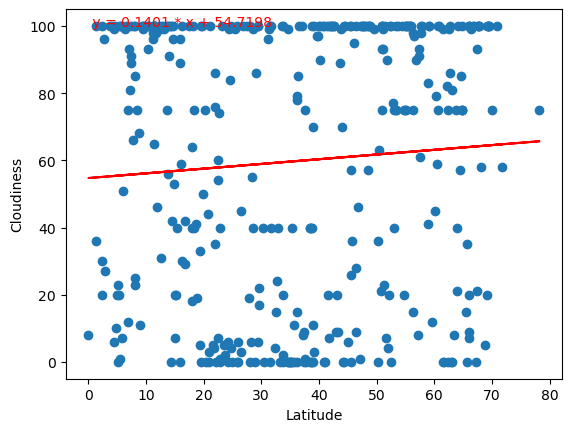

In [71]:
# Northern Hemisphere
plot_line_reg(northern_hemi_df, 'Cloudiness')

The r-value is: 0.0500


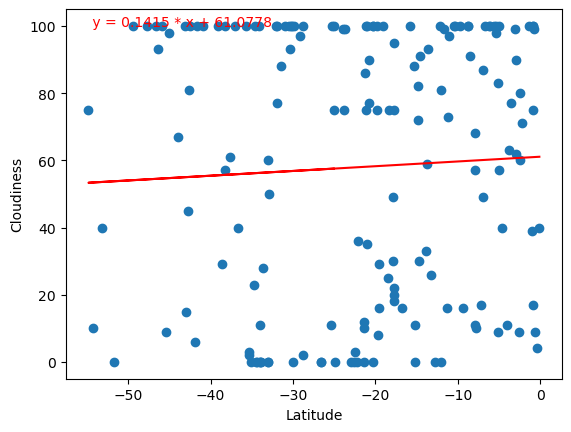

In [73]:
# Southern Hemisphere
plot_line_reg(southern_hemi_df, 'Cloudiness')

**Discussion about the linear relationship:**

The evidence suggests there is no relationship between the latitude and the clud cover of a city.

In both cases the dispesion of the datapoints is to high, and there is no observable relationship between cloudioness and the latitude of a city.

We can say that the latitude of the city has no effect on the cloud cover of a city, and the cloudiness should be related to some other factors than the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1734


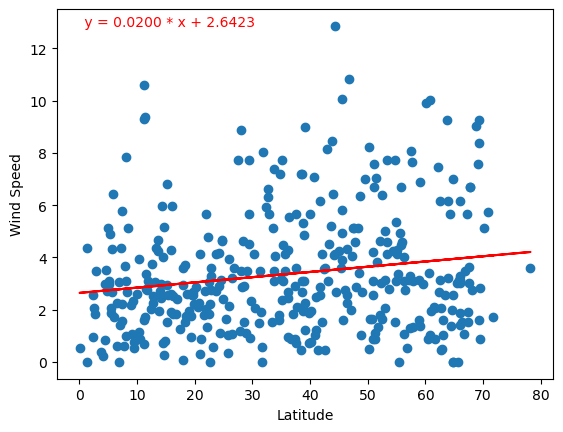

In [74]:
# Northern Hemisphere
plot_line_reg(northern_hemi_df, 'Wind Speed')

The r-value is: -0.2475


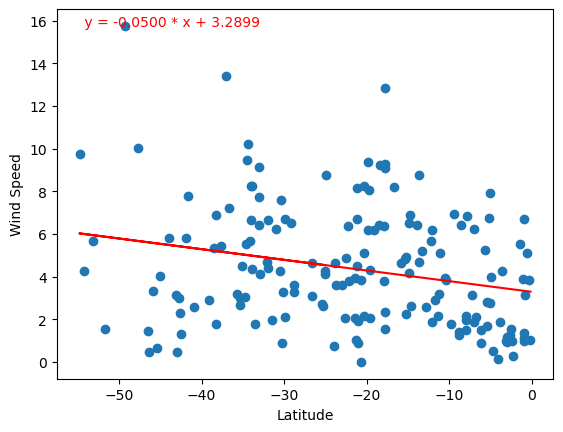

In [75]:
# Southern Hemisphere
plot_line_reg(southern_hemi_df, 'Wind Speed')

**Discussion about the linear relationship:**

The evidence suggests there is no relationship between the the wind speed of a city and the latitude where its located.

In both cases the dispesion of the datapoints is to high, and there is no observable relationship between the wind speed and the latitude of a city.

We can say that the latitude of the city has no effect on the wind speed of a city, and the wind speed should be related to some other factors than the latitude.